In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('..\data\processed/train_data_processed.csv')
validation_df = pd.read_csv('..\data\processed/validation_data_processed.csv')

In [3]:
train_df

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month,Target
0,53.0,101.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,...,168.0,7481.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0
1,55.0,101.0,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,185.0,17461.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
2,55.0,101.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,239.0,8788.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0
3,53.0,101.0,7.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,...,127.0,7065.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,55.0,101.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,...,200.0,8617.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96330,55.0,101.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,49.0,7299.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
96331,55.0,101.0,0.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,...,9.0,9089.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,1
96332,55.0,101.0,6.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.0,9629.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1
96333,55.0,101.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,106.0,8487.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1


In [56]:
train_df['Target'].value_counts()

Target
0    94335
1     2000
Name: count, dtype: int64

In [34]:
# SFS_xgb = ['country_code','demog_6','demog_7','demog_9','demog_11','demog_12','demog_14','demog_15','demog_16','demog_19','demog_21','others_5','others_9','others_12','others_14','others_18','others_19','others_20','others_21','others_23','others_24','others_27','demog_23','demog_25','demog_27','demog_28','demog_29','demog_31','demog_34','demog_35','demog_37','demog_38','others_33','others_36','others_38','others_40','others_41','demog_39','email_domain','demog_40','demog_41','demog_42','account_opening_month']
# SFS_rf = ['demog_1','city_tier','occupation','demog_5','demog_21','others_1','others_2','others_5','others_7','others_9','others_11','others_23','others_25','others_26','demog_23','demog_26','demog_32','others_36','email_domain','demog_40','account_opening_month','account_opening_year']

In [4]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['Target']),train_df['Target'] , test_size=0.2, random_state=42, stratify=train_df['Target'])



In [58]:
X_train

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,others_26,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month
58375,55.0,101.0,8.0,6.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,18.000000,174.0,8075.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0
87620,55.0,101.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,...,1.000000,237.0,7886.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
31532,55.0,101.0,2.0,5.0,0.000000,0.0,0.0,1.0,1.0,0.0,...,25.603833,243.0,15699.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
26733,53.0,101.0,3.0,4.0,0.061674,0.0,0.0,0.0,0.0,0.0,...,92.000000,367.0,17838.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
64576,55.0,101.0,1.0,4.0,0.000000,1.0,1.0,0.0,0.0,0.0,...,0.000000,245.0,9049.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69800,55.0,101.0,8.0,4.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,2.000000,158.0,7665.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
95061,401.0,101.0,8.0,5.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,42.000000,27.0,10509.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
17662,55.0,101.0,7.0,6.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,3.000000,149.0,11484.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
21656,55.0,101.0,7.0,4.0,0.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,236.0,10726.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## XGBoost

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Initialize the XGBoost classifier
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [39]:
threshold = 0.1
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_threshold, average='macro')
print(f'F1-Score on Validation Set: {f1:.4f}')

F1-Score on Validation Set: 0.9272


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


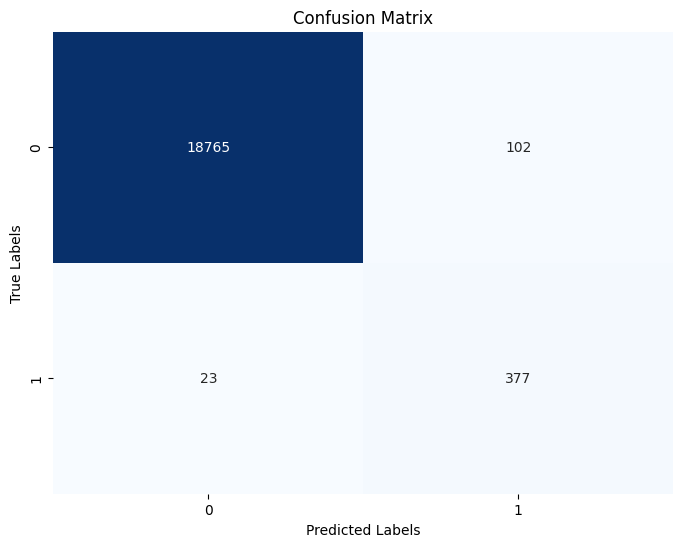

In [40]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## hyperparameter tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Assuming X_train and y_train are your training data and target

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier with GPU support
xgb_model = XGBClassifier(
    tree_method='gpu_hist',   # Use GPU acceleration
    predictor='gpu_predictor',
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Define StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomizedSearchCV with f1 score as the scoring metric
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring='f1_macro',
    n_iter=50,  # Number of parameter settings that are sampled
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\sarth\anaconda3\envs\fraud_detection\lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\sarth\anaconda3\envs\fraud_detection\lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best F1 Score:  0.9447545061218519


F1-Score on Validation Set: 0.9347


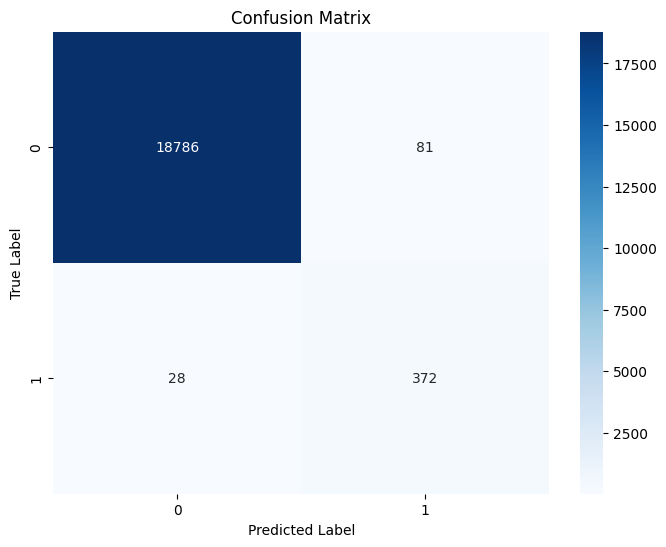

In [83]:
# After running the RandomizedSearchCV and obtaining the best model
best_xgb_model = random_search.best_estimator_

# Adjusting the decision threshold
## threshold for transaction to be non fradulent i.e. if threshold = 1 all transactions are non fradulent
threshold = 0.3
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_threshold, average='macro')
print(f'F1-Score on Validation Set: {f1:.4f}')

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Anomoly Detection